## Making an illustration of the distribution of your data
concept: for different values of a parameter you have run a several simulation and you want to visualize the distribution of the measurements with a box plot.

We will illustrate this for 30 values for from 10 different normal distribution drawn in the following way: $\mathcal{N}\left(i,\sqrt{i}\right),i\in[1,10]$.

In [1]:
# dependencies
using Distributions
using Plots
using StatPlots

Plots.gr();

In [2]:
# making the 10 distributions
ndist = 10
dists = [Distributions.Normal(i, sqrt(i)) for i in 1:ndist]
# taking the samples
n = 30
S = rand.(dists,n);

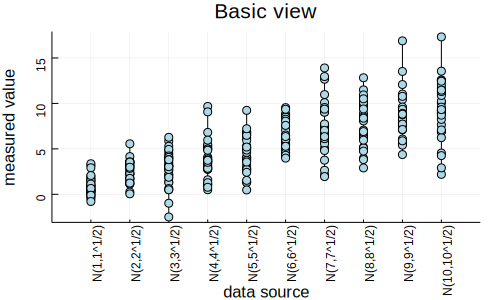

In [3]:
# classic illustration
Plots.plot(size=(500,300))
for i in 1:ndist
    Plots.plot!(i .* ones(n),S[i],marker=(:circle,:lightblue),line=:black,label="N($(i),$(i)^1/2)")
end

plot!(legend=false)
xticks!(1:ndist,["N($(i),$(i)^1/2)" for i in 1:ndist],rotation=90)
xlims!(0,ndist+1)
title!("Basic view")
ylabel!("measured value")
xlabel!("data source")

Currently there is a problem with StatPlots (specifically boxplots for multiple datsets, cf. [GitHub](https://github.com/JuliaPlots/StatPlots.jl/issues/198)), but I have illustrated a workaround below. 

We make two vectors, one containing the groups and the other one containting the actual values. For this example, the Array S contains Arrays, but the method is also suitable for other datastructures.

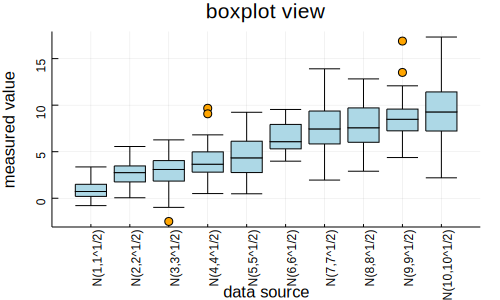

In [4]:
StatPlots.gr(size=(500,300))

group = collect(Iterators.flatten([i .*ones(length(S[i])) for i in 1:ndist]))
value = collect(Iterators.flatten(S))
boxplot(group,value,legend=false,marker=:orange,fillcolor=:lightblue,line=:black)

xticks!(1:ndist,["N($(i),$(i)^1/2)" for i in 1:ndist],rotation=90)
xlims!(0,ndist+1)
title!("boxplot view")
ylabel!("measured value")
xlabel!("data source")